# Binary image classifier of ladybugs and mimicking spiders using two layered convolutional NN with TensorFlow API
#Nathan Jones

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import glob
import time
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Nathan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


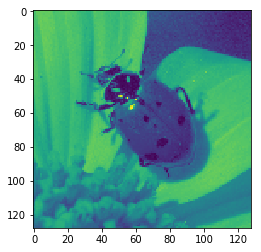

In [2]:
nH0 = 128 #images rescaled to nH0*nH0 pixels
crossNum = '04'

Ylabels = []
Xdata = []
files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/EresusGenusTrain/*.JPG")
for myFile in files:
    img = cv2.imread(myFile,0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append([1.0, 0.0])

files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/CoccinellaGenusTrain/*.JPG")
for myFile in files:
    img = cv2.imread(myFile,0)
    
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append([0.0, 1.0])
    

trainSetX = np.array(Xdata).reshape(128, nH0, nH0, 1)
trainSetX = trainSetX/255 # standardizing

trainSetY = np.array(Ylabels)

plt.imshow(Xdata[77])
plt.show()

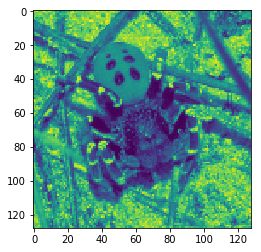

In [3]:

Ylabels = []
Xdata = []
files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/EresusGenusTest/*.JPG")
for myFile in files:
    img = cv2.imread(myFile, 0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append([1.0, 0.0])

files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/CoccinellaGenusTest/*.JPG")
for myFile in files:
    img = cv2.imread(myFile, 0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append([0.0, 1.0])
    

testSetX = np.array(Xdata).reshape(32, nH0, nH0, 1)
testSetX = testSetX/255 # standardizing

testSetY = np.array(Ylabels)

plt.imshow(Xdata[11])
plt.show()

In [4]:
#
graph = tf.Graph()
with graph.as_default():
    # variables
    # mini-batch size
    batch_size = 128
    # Hidden Layer number of neurons
    num_hidden = 1024
    # Probability of dropout
    keep_prob = 0.5
    # regularisation
    beta = 0.001
    # pixel size of mnist image
    image_size = nH0
    # number of possible target variables
    num_labels = 2
    #
    patch_size = 5
    # only 1 as grayscale
    num_channels = 1
    #
    depth = 16
    
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)
    
    def bias_variable(shape):
        initial = tf.constant(0.1, shape=shape)
        return tf.Variable(initial)
    
    def conv2d(x, W):
        return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
    
    def max_pool_2x2(x):
        return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
   
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    
    tf_train_labels  = tf.placeholder(tf.float32, shape=(batch_size, num_labels))

    
    tf_test_dataset  = tf.placeholder(tf.float32, shape=(32, image_size, image_size, num_channels))
    
    
    keep_prob = tf.placeholder(tf.float32)
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    
    W_fc1 = weight_variable([int(nH0/4) * int(nH0/4) * 64, 1024])
    b_fc1 = bias_variable([1024])
    
    W_fc2 = weight_variable([1024, 2])
    b_fc2 = bias_variable([2])
    

    
    # The Model
    def model(data):
        # The NN
        # Return the output layer
        h_conv1 = tf.nn.relu(conv2d(data, W_conv1) + b_conv1)
        h_pool1 = max_pool_2x2(h_conv1)
        
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
        h_pool2 = max_pool_2x2(h_conv2)
        
        h_pool2_flat = tf.reshape(h_pool2, [-1, int(nH0/4) * int(nH0/4) * 64])
        
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
        
        return tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
    
    # Training computations
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
    
    # Optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(loss)
    #optimizer = tf.train.AdamOptimizer(0.5).minimize(loss)
    
    # Predictions for the training, validation and test data
    train_prediction = tf.nn.softmax(logits)
    
    test_prediction  = tf.nn.softmax(model(tf_test_dataset))
    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [5]:
# Accuracy calculation
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

In [6]:
ti = time.time()
num_steps = 2001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    
    print("Initialized...")
    
    for step in range(num_steps):
        
        # generate a batch
        batch_data  = trainSetX
        batch_labels = trainSetY

        # Prepare a dictionary telling the session where to feed the mini-batch
        # The key of the dictionary is the placeholder node of the graph to be fed
        # and the value is the numpy array to feed it.
        feed_dict = {tf_train_dataset : trainSetX, tf_train_labels : trainSetY, keep_prob: 0.5}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 100 == 0):
            print("Mini-batch Loss at step %d: %f" % (step, l))
            print("Mini-batch Accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            
    
    print("Test Accuracy: %.1f%%" % accuracy(test_prediction.eval(feed_dict={tf_test_dataset:testSetX, keep_prob: 1.0}), testSetY))
tf = time.time()
print("time taken = ", (tf-ti), " seconds")

Initialized...
Mini-batch Loss at step 0: 0.801738
Mini-batch Accuracy: 50.0%
Mini-batch Loss at step 100: 0.751283
Mini-batch Accuracy: 56.2%
Mini-batch Loss at step 200: 0.605790
Mini-batch Accuracy: 70.3%
Mini-batch Loss at step 300: 0.574101
Mini-batch Accuracy: 73.4%
Mini-batch Loss at step 400: 0.555133
Mini-batch Accuracy: 75.0%
Mini-batch Loss at step 500: 0.519827
Mini-batch Accuracy: 79.7%
Mini-batch Loss at step 600: 0.474025
Mini-batch Accuracy: 82.8%
Mini-batch Loss at step 700: 0.401572
Mini-batch Accuracy: 91.4%
Mini-batch Loss at step 800: 0.408660
Mini-batch Accuracy: 89.8%
Mini-batch Loss at step 900: 0.435354
Mini-batch Accuracy: 86.7%
Mini-batch Loss at step 1000: 0.381425
Mini-batch Accuracy: 93.0%
Mini-batch Loss at step 1100: 0.379790
Mini-batch Accuracy: 93.0%
Mini-batch Loss at step 1200: 0.352732
Mini-batch Accuracy: 96.1%
Mini-batch Loss at step 1300: 0.356730
Mini-batch Accuracy: 95.3%
Mini-batch Loss at step 1400: 0.364774
Mini-batch Accuracy: 94.5%
Mini-ba